In [2]:
import pandas_oracle.tools as pt # pandas의 oracle DB 연결하는 패키지
import os # 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [5]:
os.putenv('NLS_LANG', '.UTF8')
conn = pt.open_connection('../oracle\config.yml')

In [6]:
# 전체 상권별 총 월매출액 비교 (월매출액별 정렬)

query1 = '''
SELECT 
    S_LOCATION,
    round(sum(TS_MONTH_AMT)) AS totalsell
FROM 
    TOTALSELL T,
    ASTORE A
WHERE 
    T.S_CODE = A.S_CODE
GROUP BY S_LOCATION
ORDER BY totalsell DESC
'''

In [7]:
df_s_code_total = pt.query_to_df(query1, conn, 1000000)

In [8]:
#상위 10개 매출액

top_five_s_code = df_s_code_total.head(10)
print(top_five_s_code)
print('\n')


#하위 10개 매출액
low_five_s_code = df_s_code_total.tail(10)
print(low_five_s_code)

     S_LOCATION    TOTALSELL
0           코엑스  27977893243
1   강남 마이스 관광특구  27977893243
2      문래동 주민센터  22187845987
3         연서로5길  21949063551
4        고속터미널역  19937424759
5  서울 강남구 대치역_1  19681078542
6       사평대로22길  18667179305
7      방이동 먹자골목  18615072918
8       공항대로61길  18287647453
9        학동로77길  18063751263


     S_LOCATION  TOTALSELL
1483       유영시장  175498154
1484       합정시장  165488133
1485       구의시장  135282850
1486       번동시장  130272535
1487     동부청과시장  121170053
1488  청량리농수산물시장  118635202
1489      청평화시장  106099440
1490     자양종합시장   58488125
1491     논현종합시장   26429809
1492      남평화시장   22965904


<Figure size 432x288 with 0 Axes>

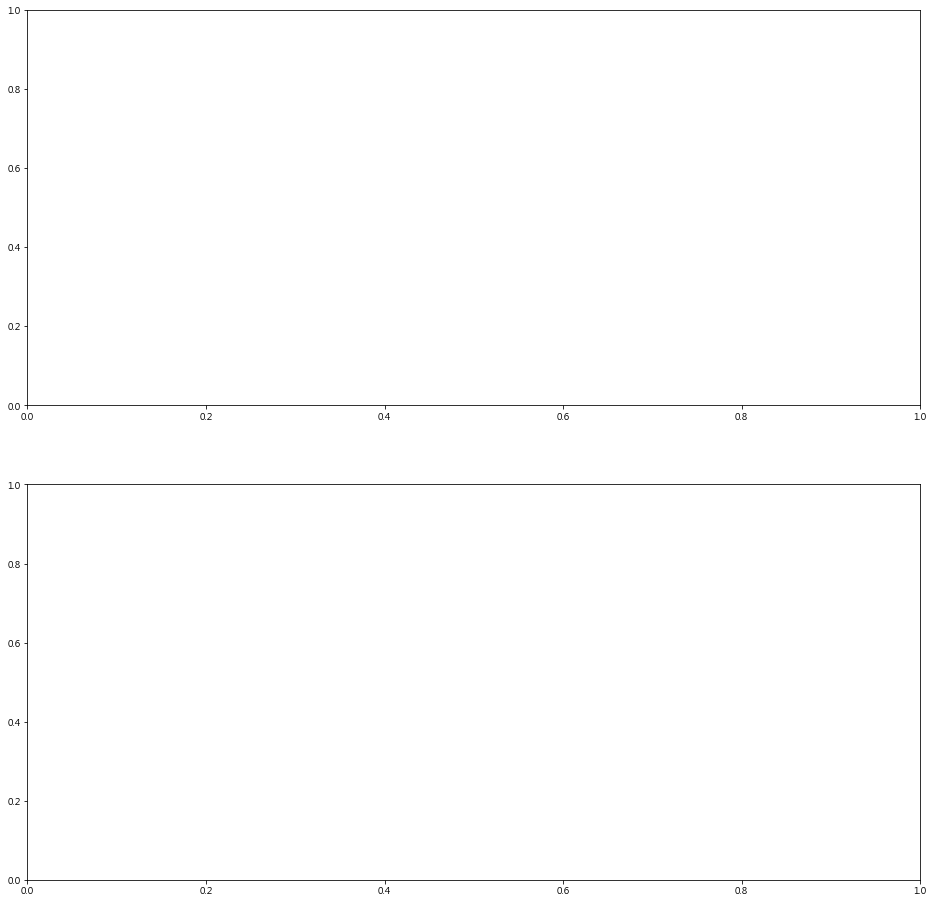

In [10]:
fig = plt.figure()
fig = plt.figure(figsize=(16, 16)) 
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

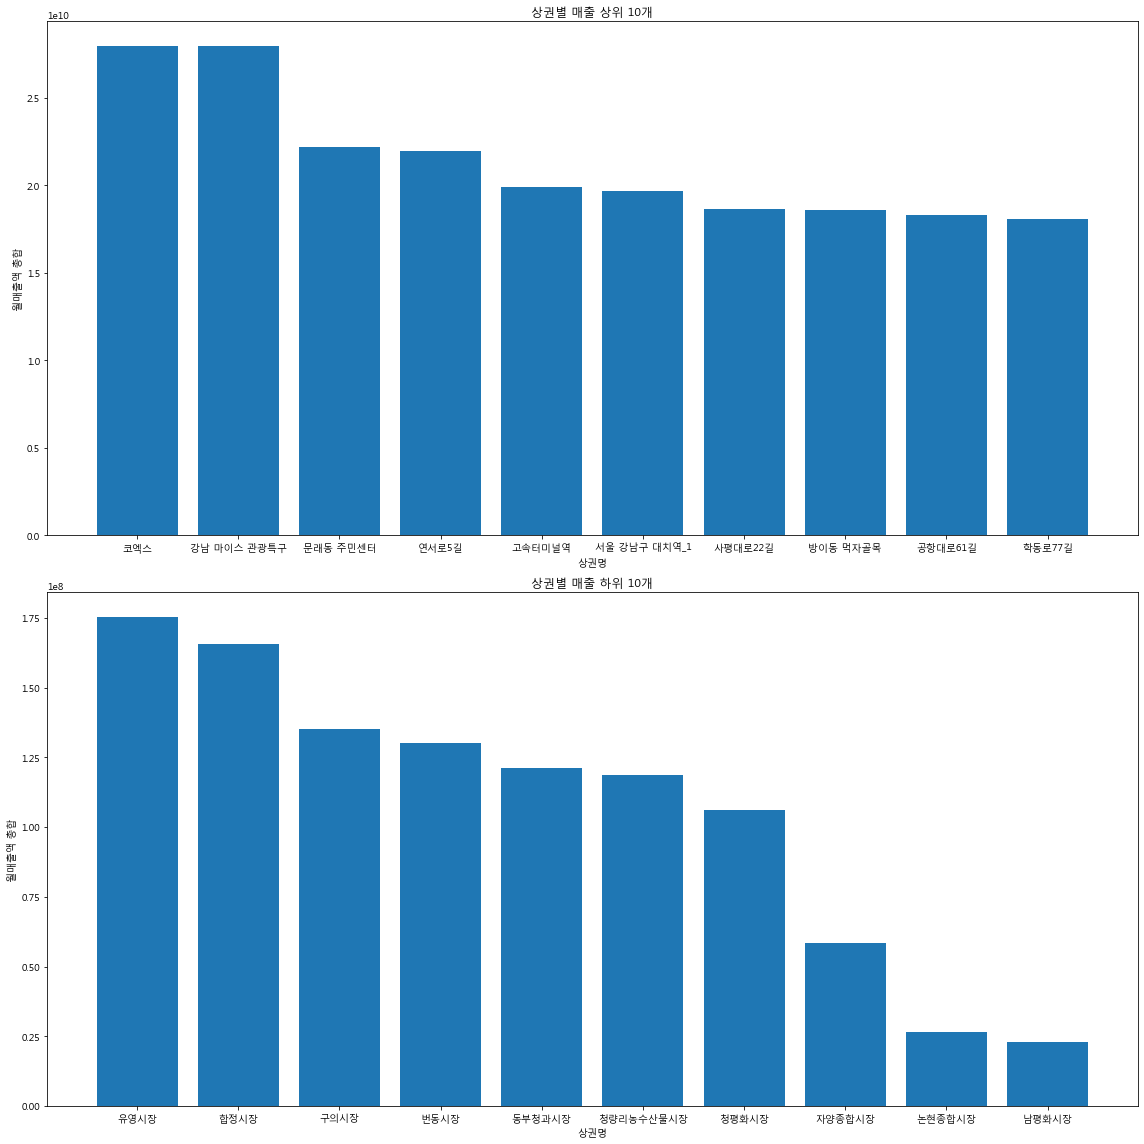

In [11]:
ax1.bar(top_five_s_code['S_LOCATION'], top_five_s_code['TOTALSELL'])
ax2.bar(low_five_s_code['S_LOCATION'], low_five_s_code['TOTALSELL'])

ax1.set_title('상권별 매출 상위 10개')
ax2.set_title('상권별 매출 하위 10개')

ax1.set_xlabel('상권명')
ax1.set_ylabel('월매출액 총합')

ax2.set_xlabel('상권명')
ax2.set_ylabel('월매출액 총합')

fig.tight_layout()
fig

In [12]:
# 매출액 1등 상권(코엑스)의 요일별 매출액 (총 매출액별 정렬)

query1 = '''
SELECT 
    to_char(S_CODE) S_CODE,
    round(sum(TS_MON_AMT + TS_TUE_AMT + TS_WED_AMT + TS_THU_AMT + TS_FRI_AMT + TS_SAT_AMT + TS_SUN_AMT)) TOTAL,
    round(sum(TS_MON_AMT)) MON,
    round(sum(TS_TUE_AMT)) TUE,
    round(sum(TS_WED_AMT)) WED,
    round(sum(TS_THU_AMT)) THU,
    round(sum(TS_FRI_AMT)) FRI,
    round(sum(TS_SAT_AMT)) SAT,
    round(sum(TS_SUN_AMT)) SUN
FROM 
    DAY_AMT_ANALYSIS
WHERE
    S_CODE = 1001103
GROUP BY S_CODE
ORDER BY TOTAL DESC
'''

In [13]:
# 매출액 2등 상권(코엑스)의 요일별 매출액 (총 매출액별 정렬)

query2 = '''
SELECT 
    to_char(S_CODE) S_CODE,
    round(sum(TS_MON_AMT + TS_TUE_AMT + TS_WED_AMT + TS_THU_AMT + TS_FRI_AMT + TS_SAT_AMT + TS_SUN_AMT)) TOTAL,
    round(sum(TS_MON_AMT)) MON,
    round(sum(TS_TUE_AMT)) TUE,
    round(sum(TS_WED_AMT)) WED,
    round(sum(TS_THU_AMT)) THU,
    round(sum(TS_FRI_AMT)) FRI,
    round(sum(TS_SAT_AMT)) SAT,
    round(sum(TS_SUN_AMT)) SUN
FROM 
    DAY_AMT_ANALYSIS
WHERE
    S_CODE = 1001496
GROUP BY S_CODE
ORDER BY TOTAL DESC
'''

In [14]:
# 매출액 3등 상권(코엑스)의 요일별 매출액 (총 매출액별 정렬)

query3 = '''
SELECT 
    to_char(S_CODE) S_CODE,
    round(sum(TS_MON_AMT + TS_TUE_AMT + TS_WED_AMT + TS_THU_AMT + TS_FRI_AMT + TS_SAT_AMT + TS_SUN_AMT)) TOTAL,
    round(sum(TS_MON_AMT)) MON,
    round(sum(TS_TUE_AMT)) TUE,
    round(sum(TS_WED_AMT)) WED,
    round(sum(TS_THU_AMT)) THU,
    round(sum(TS_FRI_AMT)) FRI,
    round(sum(TS_SAT_AMT)) SAT,
    round(sum(TS_SUN_AMT)) SUN
FROM 
    DAY_AMT_ANALYSIS
WHERE
    S_CODE = 1001118
GROUP BY S_CODE
ORDER BY TOTAL DESC
'''

In [15]:
# 매출액 4등 상권(코엑스)의 요일별 매출액 (총 매출액별 정렬)

query4 = '''
SELECT 
    to_char(S_CODE) S_CODE,
    round(sum(TS_MON_AMT + TS_TUE_AMT + TS_WED_AMT + TS_THU_AMT + TS_FRI_AMT + TS_SAT_AMT + TS_SUN_AMT)) TOTAL,
    round(sum(TS_MON_AMT)) MON,
    round(sum(TS_TUE_AMT)) TUE,
    round(sum(TS_WED_AMT)) WED,
    round(sum(TS_THU_AMT)) THU,
    round(sum(TS_FRI_AMT)) FRI,
    round(sum(TS_SAT_AMT)) SAT,
    round(sum(TS_SUN_AMT)) SUN
FROM 
    DAY_AMT_ANALYSIS
WHERE
    S_CODE = 1000411
GROUP BY S_CODE
ORDER BY TOTAL DESC
'''

In [16]:
df_TOP1_S_CODE_BY_DAY= pt.query_to_df(query1, conn, 1000000)
df_TOP2_S_CODE_BY_DAY= pt.query_to_df(query2, conn, 1000000)
df_TOP3_S_CODE_BY_DAY= pt.query_to_df(query3, conn, 1000000)
df_TOP4_S_CODE_BY_DAY= pt.query_to_df(query4, conn, 1000000)


In [17]:
# 1등 상권의 요일별 데이터
일등상권_data = df_TOP1_S_CODE_BY_DAY.loc[0, ['MON','TUE','WED','THU','FRI','SAT','SUN']]
print(일등상권_data)
print('\n')

# 2등 상권의 요일별 데이터
이등상권_data = df_TOP2_S_CODE_BY_DAY.loc[0, ['MON','TUE','WED','THU','FRI','SAT','SUN']] 
print(이등상권_data)
print('\n')

# 3등 상권의 요일별 데이터
삼등상권_data = df_TOP3_S_CODE_BY_DAY.loc[0, ['MON','TUE','WED','THU','FRI','SAT','SUN']] 
print(삼등상권_data)
print('\n')

# 4등 상권의 요일별 데이터
사등상권_data = df_TOP4_S_CODE_BY_DAY.loc[0, ['MON','TUE','WED','THU','FRI','SAT','SUN']] 
print(사등상권_data)
print('\n')

MON    3804703143
TUE    3767805080
WED    3565856749
THU    4249259690
FRI    4550672519
SAT    4129900494
SUN    3909695568
Name: 0, dtype: object


MON    3804703143
TUE    3767805080
WED    3565856749
THU    4249259690
FRI    4550672519
SAT    4129900494
SUN    3909695568
Name: 0, dtype: object


MON    3254320169
TUE    4199992073
WED    4014046240
THU    4044295430
FRI    5054440716
SAT    1262557039
SUN     358194320
Name: 0, dtype: object


MON    3836193022
TUE    3835763863
WED    2314075584
THU    4243365335
FRI    6562957583
SAT     690667158
SUN     466041006
Name: 0, dtype: object




<Figure size 432x288 with 0 Axes>

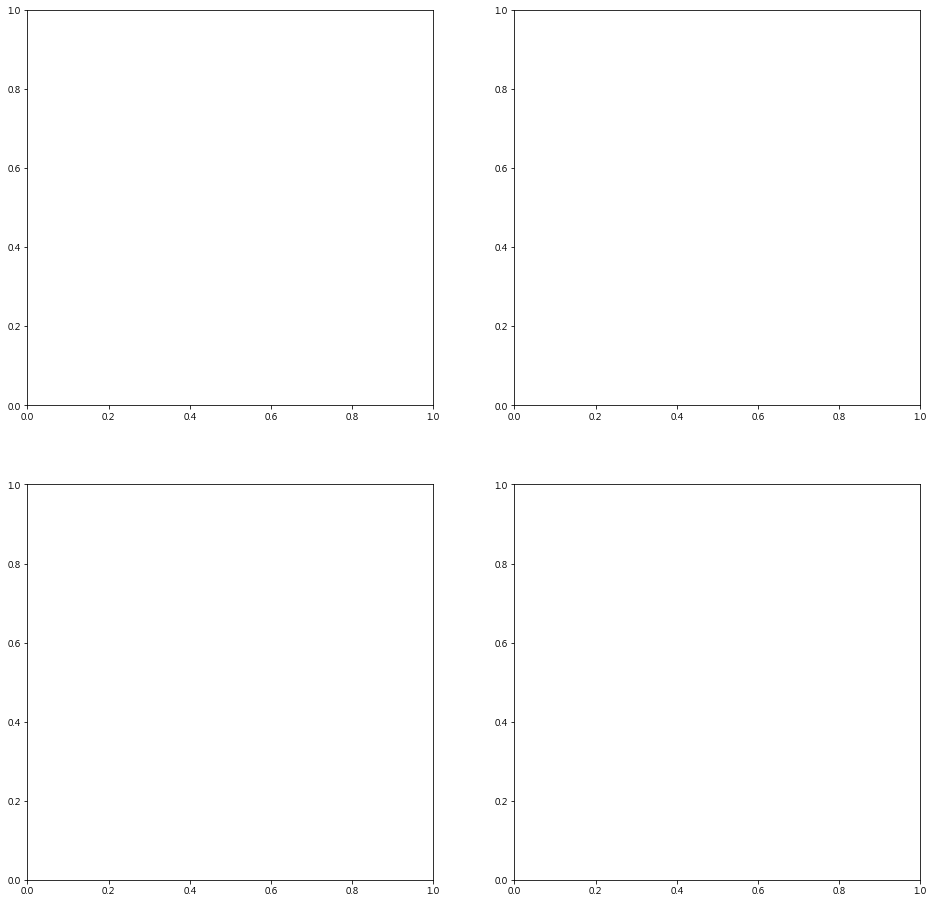

In [19]:
fig = plt.figure()
fig = plt.figure(figsize=(16, 16)) 
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

In [20]:
labels = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
data1 = 일등상권_data
data2 = 이등상권_data 
data3 = 삼등상권_data
data4 = 사등상권_data

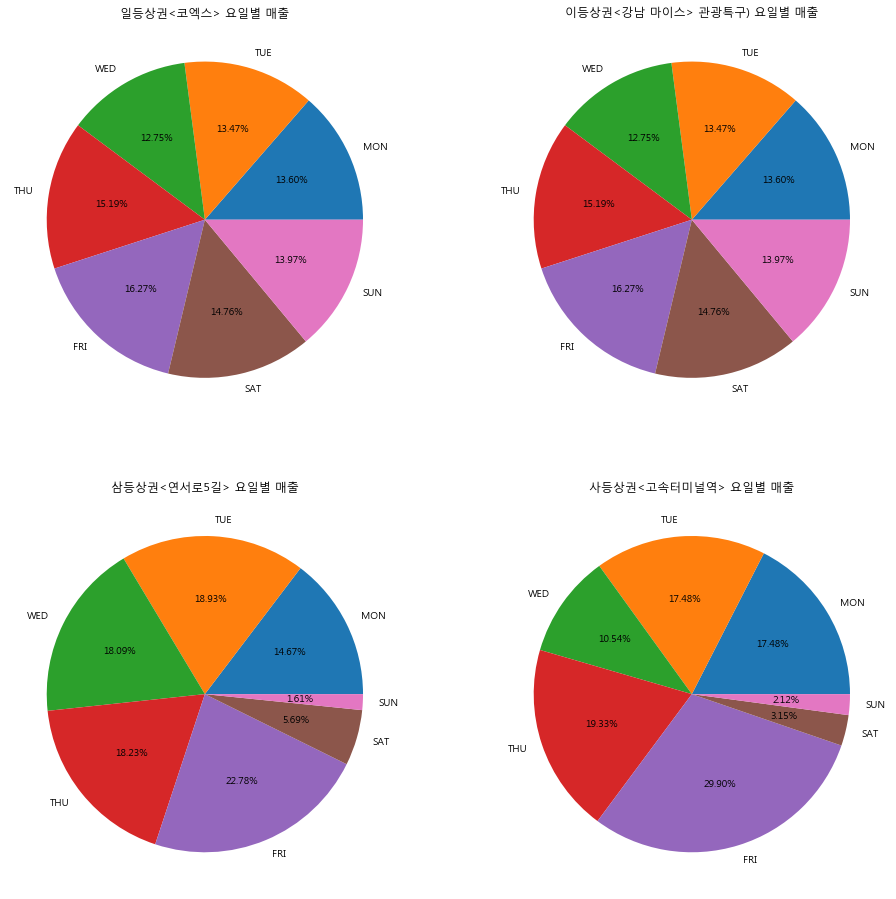

In [21]:
# 1등 상권의 요일별 데이터
ax1.pie(data1, labels=labels, autopct = '%1.2f%%')
ax2.pie(data2, labels=labels, autopct = '%1.2f%%')
ax3.pie(data3, labels=labels, autopct = '%1.2f%%')
ax4.pie(data4, labels=labels, autopct = '%1.2f%%')

ax1.set_title('일등상권<코엑스> 요일별 매출')
ax2.set_title('이등상권<강남 마이스> 관광특구) 요일별 매출')
ax3.set_title('삼등상권<연서로5길> 요일별 매출')
ax4.set_title('사등상권<고속터미널역> 요일별 매출')
fig

In [22]:
top_five_s_code = df_s_code_total.head(10)
# 상위 5개 매출액 상권 리스트
top_five_list = list(top_five_s_code['S_LOCATION'])
top_five_list

['코엑스',
 '강남 마이스 관광특구',
 '문래동 주민센터',
 '연서로5길',
 '고속터미널역',
 '서울 강남구 대치역_1',
 '사평대로22길',
 '방이동 먹자골목',
 '공항대로61길',
 '학동로77길']

In [23]:
# 상권별 성별 매출비교
query = '''
SELECT 
    S_LOCATION,
    round(sum(TS_MALE_AMT + TS_FEMALE_AMT)) TOTAL,
    round(sum(TS_MALE_AMT)) MALE,
    round(sum(TS_FEMALE_AMT)) FEMALE
FROM 
    GENDER_AMT_ANALYSIS t1,
    ASTORE t2
WHERE 
    t1.S_CODE = t2.S_CODE
GROUP BY 
    S_LOCATION
ORDER BY
    TOTAL DESC 
'''

In [24]:
df_S_CODE_BY_GENDER = pt.query_to_df(query, conn, 1000000)
df_top5 = df_S_CODE_BY_GENDER.head(10)
df_low5 = df_S_CODE_BY_GENDER.tail(10)
df_top5

,S_LOCATION,TOTAL,MALE,FEMALE
0,코엑스,23497513230,10326717654,13170795577
1,강남 마이스 관광특구,23497513230,10326717654,13170795577
2,연서로5길,20647423864,3629686093,17017737771
3,고속터미널역,18216725374,6580419923,11636305451
4,서울 강남구 대치역_1,17865497700,8421087191,9444410509
5,방이동 먹자골목,16525396138,9903825639,6621570500
6,남부순환로325길,16438782144,12086672370,4352109775
7,상도로62길,16317797301,8246023255,8071774045
8,서울 강북구 수유역_1,15932869502,6253095269,9679774233
9,서울 광진구 건대입구역_2,15889268163,6627408049,9261860114


<Figure size 432x288 with 0 Axes>

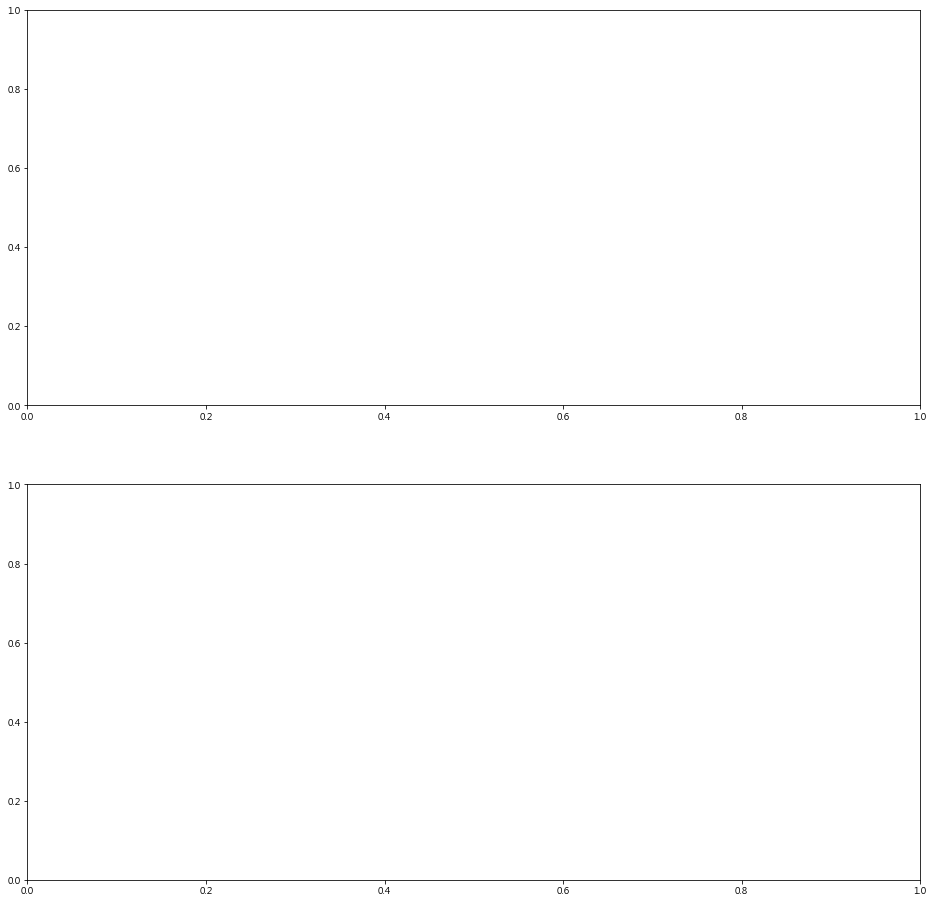

In [25]:
fig = plt.figure()
fig = plt.figure(figsize=(16, 16)) 
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

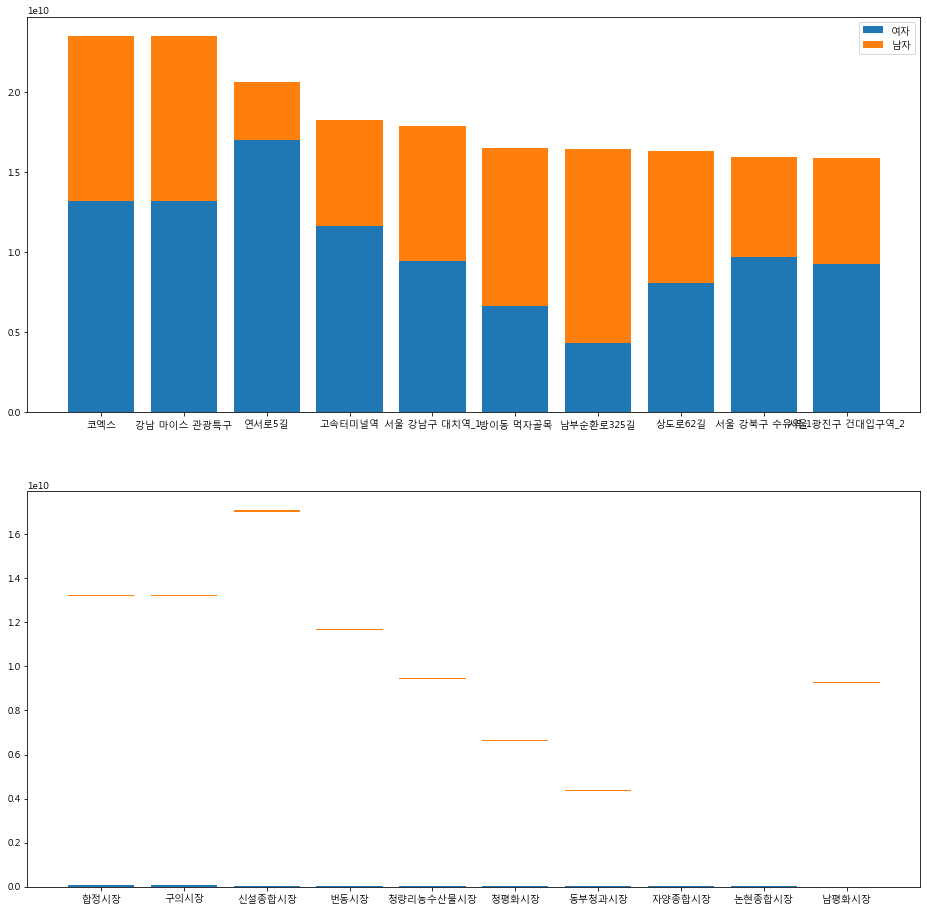

In [26]:
ax1.bar(df_top5['S_LOCATION'], df_top5['FEMALE'], label = '여자')
ax1.legend(loc='upper right')
ax1.bar(df_top5['S_LOCATION'], df_top5['MALE'], bottom = df_top5['FEMALE'], label = '남자')
ax1.legend(loc='upper right')

ax2.bar(df_low5['S_LOCATION'], df_low5['FEMALE'])
ax2.bar(df_low5['S_LOCATION'], df_low5['MALE'], bottom = df_top5['FEMALE'] )

fig